# Magnetic Field Computation
## Biot-Savart's Law
<img src="https://github.com/nayot/emag/blob/main/pics/biot-savart.png?raw=true" alt="Image" style="width: 50%;"/>

$$\mathbf{dH}=\frac{I\mathbf{dr'}\times (\mathbf{r-r'})}{4\pi\mathbf{|r-r'|^3}}$$

สำหรับเส้นทางที่กระแสไหลที่อธิบายได้ด้วย Parametric equation $<x, y>=<x(t), y(t)>$

$$\mathbf{dr'}=\frac{\mathbf{dr'}}{dt}dt$$

ดังนั้น

$$\mathbf{H}=\oint\mathbf{dH}$$

## สนามแม่เหล็กเนื่องจากกระแสที่ไหนบนตัวนำตรง
หาสนามแม่เหล็กที่เนื่องจากกระแส $I=1~A$ ที่ไหลในตัวนำตรงยาวอนันต์ที่วางอยู่บนแนวแกน $z$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot
import sympy as smp
from scipy.integrate import dblquad
from joblib import Parallel, delayed

In [2]:
x, y, z, t = smp.symbols('x, y, z, t', real=True)
r = smp.Matrix([x, y, z])
rp = smp.Matrix([0., 0., t])
R = r - rp
R

Matrix([
[     x],
[     y],
[-t + z]])

In [3]:
I = 1.0
dHdt = I * smp.diff(rp, t).cross(R) / (4. * smp.pi * R.norm()**3)
dHdt

Matrix([
[-0.25*y/(pi*(x**2 + y**2 + (t - z)**2)**(3/2))],
[ 0.25*x/(pi*(x**2 + y**2 + (t - z)**2)**(3/2))],
[                                             0]])

In [4]:
H = smp.integrate(dHdt, (t, -smp.oo, smp.oo))
H

Matrix([
[-0.5*y/(pi*(x**2 + y**2))],
[ 0.5*x/(pi*(x**2 + y**2))],
[                        0]])

In [5]:
H_func_x = smp.lambdify([x, y], H[0])
H_func_y = smp.lambdify([x, y], H[1])

def H2D(x, y):
    Hx = H_func_x(x, y)
    Hy = H_func_y(x, y)
    return np.array([Hx, Hy])

H2D(1, 1)

array([-0.07957747,  0.07957747])

<Axes: xlabel='x', ylabel='y'>

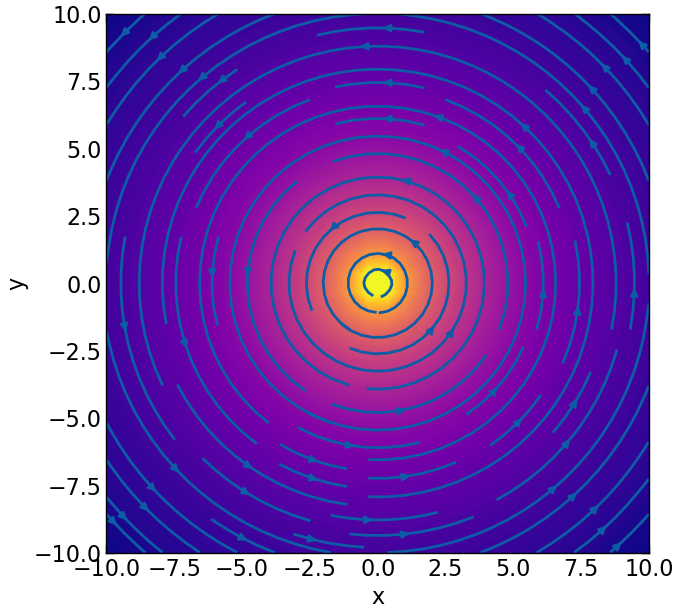

In [16]:
plt.figure(figsize=(7, 7))
field_plot(H2D, contour=True, streamline=True, normalising=False, num_grids=30)

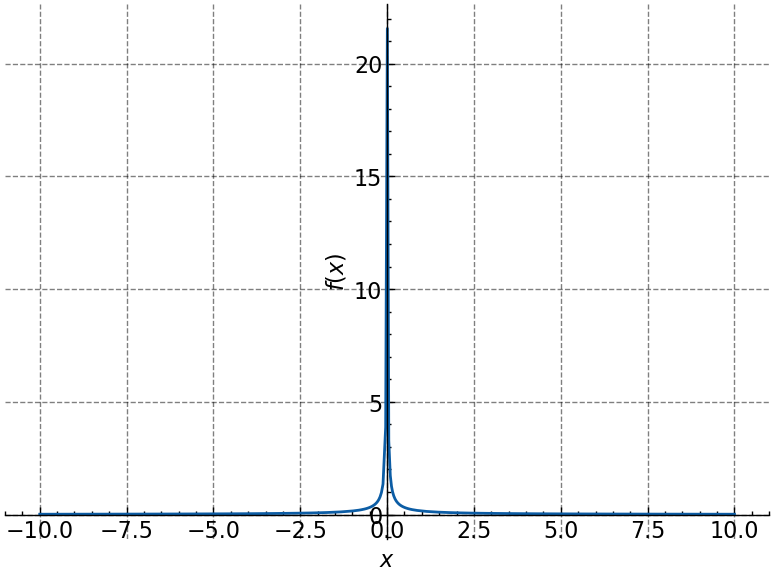

In [7]:
smp.plot(H.norm().simplify().subs(y, 0))